# Can we predict who would've survived the Titanic?

### This notebook goes through a basic exploratory data analysis of the Kaggle Titanic dataset with Python

Although this notebook works towards creating a Kaggle submission, it should not be taken as exhaustive list of things to do with a dataset. It has been setup as an introduction to get you started with exploratory data analysis (EDA).

There are challenges and extensions listed throughout. I encourage you to take the foundations here and build upon them.

If you complete the challenges or get a better score than the one listed at the bottom of this notebook, [tweet me](www.twitter.com/mrdbourke) and I'llgive your work a shout out.

If you're interested, there's a video walkthrough of this notebook available on my YouTube: https://youtu.be/f1y9wDDxWnA

Keep learning,

Daniel

## Step 0: Why EDA?


Not all data comes in a neat little package ready to be modelled by the latest and greatest machine learning models.

Most of the time, you'll get a dataset you don't know much about. So before you can make any solid predictions, you'll to find out more.

This is where EDA comes in.

The main thing to remember is the first word. Exploratory. You're trying to figure out more about the data so you can build a model the best way you can.

You'll usually do this when you first look at a dataset but it'll continually happen as you learn more. EDA is an iterative process. There's no one way to do it either. It'll vary with each new dataset but there are some things you'll find yourself doing more often, we'll talk about those in this notebook and in a future blog post.


## Step 1: Download the data

You can download the data for this notebook here: https://www.kaggle.com/c/titanic/data

## Step 2: Work through the notebook
    
First we will import all the relevant dependencies we need.

If you don't have any of these, the notebook will throw an error. The error will likely tell you what you don't have. Then you'll have to install it.

You can usually figure out how to install it by Googling: "how to install [the thing you don't have]".

**PS** If you have any questions, feedback, advice or bug fixes, please let me know.

In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

### Loading in the data

After we've downloaded the data, we need to get it into the notebook.

I've stored my downloaded data in a file called `data`.

In [2]:
# Import train & test data 
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('data/gender_submission.csv') # example of what a submission should look like

In [3]:
# View the training data
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<AxesSubplot:ylabel='Frequency'>

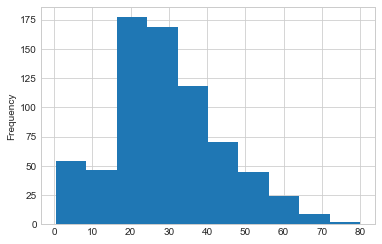

In [4]:
train.Age.plot.hist()

In [5]:
# View the test data (same columns as the training data)
test.head() # head = view first 5 lines

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# View the example submisison dataframe
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Data Descriptions

**Survival:** 0 = No, 1 = Yes

**pclass (Ticket class):** 1 = 1st, 2 = 2nd, 3 = 3rd

**sex:** Sex

**Age:** Age in years

**sibsp:** number of siblings/spouses aboard the Titanic

**parch:** number of parents/children aboard the Titanic

**ticket:** Ticket number

**fare:** Passenger fare

**cabin:** Cabin number

**embarked:** Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## What missing values are there?

Where are the holes in our data?

These are rows which are missing a value or have NaN instead of something like the rest of the column.

<AxesSubplot:>

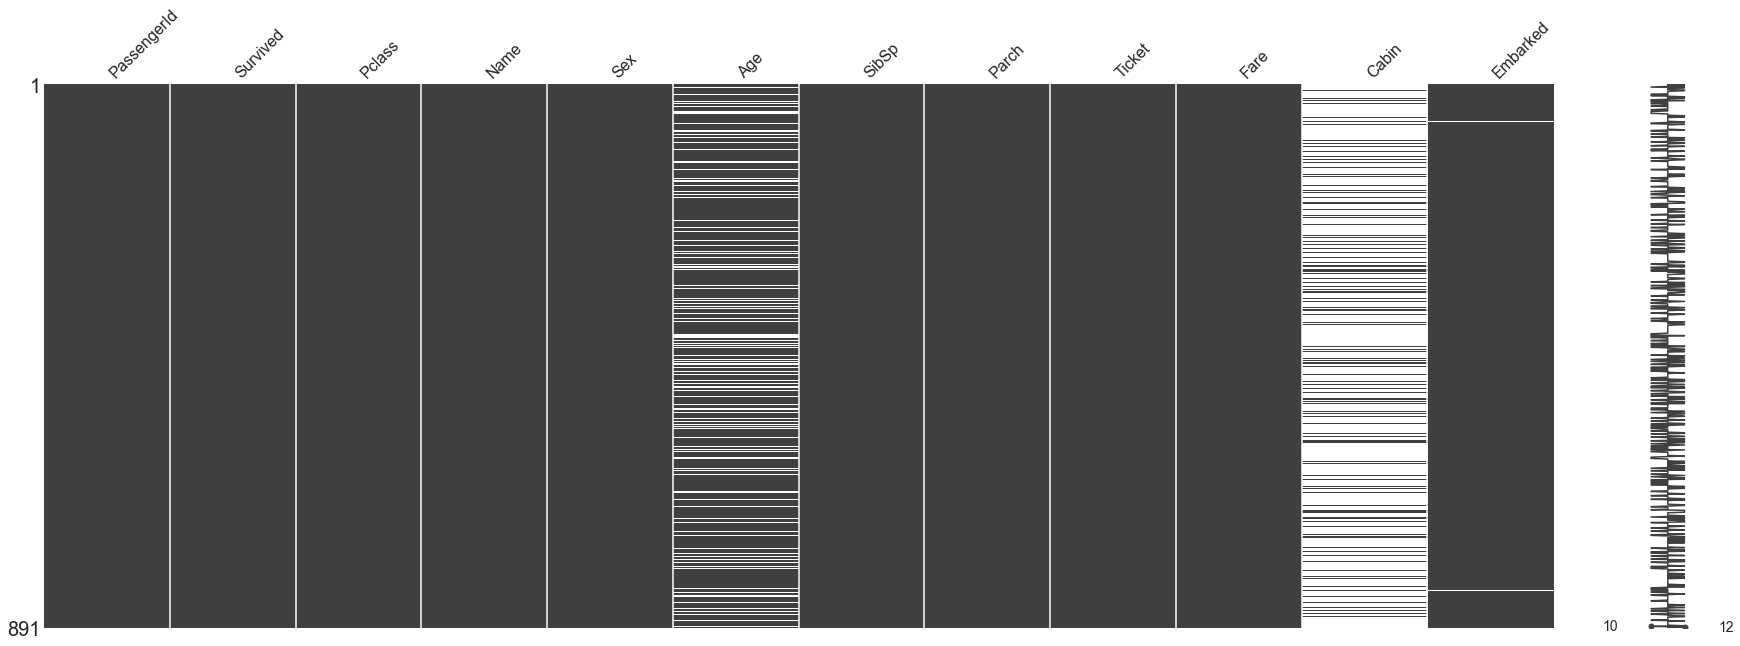

In [8]:
# Plot graphic of missing values
missingno.matrix(train, figsize = (30,10))

Ok we can clearly see some missing values here. Especially in the cabin column.

It's important to visualise missing values early so you know where the major holes are in your dataset.

Knowing this informaiton will help with your EDA and figuring out what kind of data cleaning and preprocessing is needed.

In [9]:
# Alternatively, you can see the number of missing values like this
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## To perform our data analysis, let's create two new dataframes

We'll create one for exploring discretised continuous variables (continuous variables which have been sorted into some kind of category) and another for exploring continuous variables.

In [10]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

## What datatypes are in the dataframe?

As a general rule of thumb, features with a datatype of object could be considered categorical features. And those which are floats or ints (numbers) could be considered numerical features.

However, as we dig deeper, we might find features which are numerical may actually be categorical.

The goal for the next few steps is to figure out how best to process the data so our machine learning model can learn from it.

Ideally, all the features will be encoded into a numerical value of some kind. 

In [11]:
# Different data types in the dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Let's explore each of these features individually
We'll go through each column iteratively and see which ones to use in our first models.
Some may need more preprocessing than others to get ready.

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Target Feature: Survived

Description: Whether the passenger survived or not.
    
Key: 0 = did not survive, 1 = survived
    
This is the variable we want our machine learning model to predict based off all the others.

0    549
1    342
Name: Survived, dtype: int64


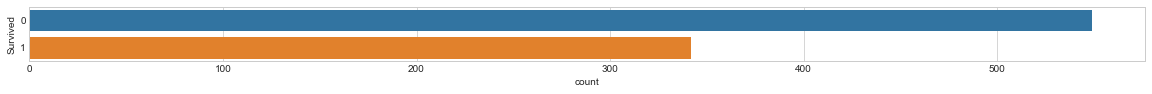

In [13]:
# How many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [14]:
# Let's add this to our subset dataframes
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [15]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [16]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Feature: Pclass

Description: The ticket class of the passenger.
    
Key: 1 = 1st, 2 = 2nd, 3 = 3rd

#### Let's plot the distribution
We will look at the distribution of each feature first if we can to understand what kind of spread there is across the dataset.

For example, if there are values which are completely outside of the distribution, we may not want to include them in our model.

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

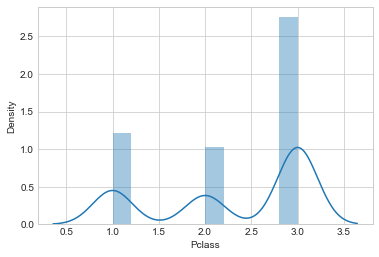

In [17]:
sns.distplot(train.Pclass)

We can see with this feature, the values are numerical (1, 2 and 3) but they are categories.

How do we know this? Because a passenger in Class 3 doesn't necessarily equal a passenger in Class 2 + a passenger in Class 1.

In [18]:
# How many missing variables does Pclass have?
train.Pclass.isnull().sum()

0

Since there are no missing values in Pclass, let's add it to our sub dataframes.

In [19]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

### Feature: Name
    
Description: The name of the passenger.

In [20]:
# How many different names are there?
train.Name.value_counts()

Williams, Mr. Howard Hugh "Harry"                 1
Hale, Mr. Reginald                                1
Dowdell, Miss. Elizabeth                          1
Harper, Rev. John                                 1
Lemberopolous, Mr. Peter L                        1
                                                 ..
Coleff, Mr. Peju                                  1
Jussila, Miss. Mari Aina                          1
Reeves, Mr. David                                 1
Kirkland, Rev. Charles Leonard                    1
Chambers, Mrs. Norman Campbell (Bertha Griggs)    1
Name: Name, Length: 891, dtype: int64

Every row has a unique name. This is equivalent to the passenger ID. But name could be used differently.

Can you think of ways you could reduce the number of different names? Or create new features out of the names?

**Note:** Because of so many different names and to keep this EDA fast, we won't move forward using the name variable.

### Feature: Sex

Description: The sex of the passenger (male or female).

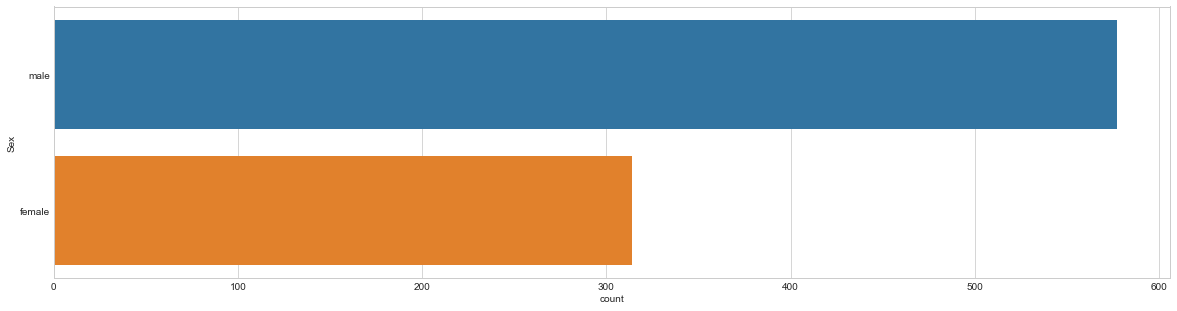

In [21]:
# Let's view the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=train);

In [22]:
# Are there any missing values in the Sex column?
train.Sex.isnull().sum()

0

Since this is already binary variable (male or female), let's add it straight to our subset dataframes.

In [23]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [24]:
# add Sex to the subset dataframes
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0) # change sex to 0 for male and 1 for female

df_con['Sex'] = train['Sex']

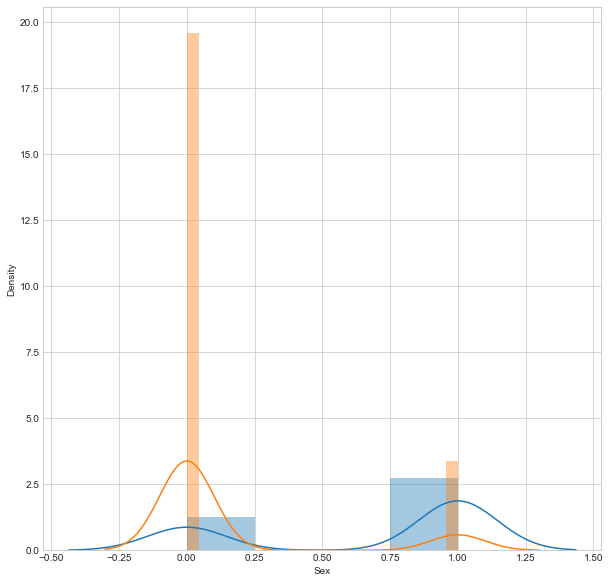

In [25]:
# How does the Sex variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});

Not many people survived. But of those who did, more were female.

### Feature: Age

Description: The age of the passenger.

In [26]:
# How many missing values does age have?
train.Age.isnull().sum()

177

Out of a total 891 rows, that's almost one quarter of the dataset.

What would you do with these missing values?

Could replace them with the average age? What's the pro's and con's of doing this?

Or would you get rid of them completely?

We won't answer these questions in our initial EDA but this is something we would definitely revisit at a later date.


In [27]:
# Once the Age values have been fixed up, we can add them to our sub dataframes.
# df_bin['Age'] = pd.cut(train['Age'], 10) # bucketed/binned into different categories
# df_con['Age'] = train['Age'] # non-bucketed

**Challenge:** How would you fill the missing variables in the `Age` column?

#### Function to create count and distribution visualisations

In [28]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

### Feature: SibSp

Description: The number of siblings/spouses the passenger has aboard the Titanic.

In [29]:
# How many missing values does SibSp have?
train.SibSp.isnull().sum()

0

In [30]:
# What values are there?
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Let's add SibSp to our subset dataframes and view the distributions.

In [31]:
# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

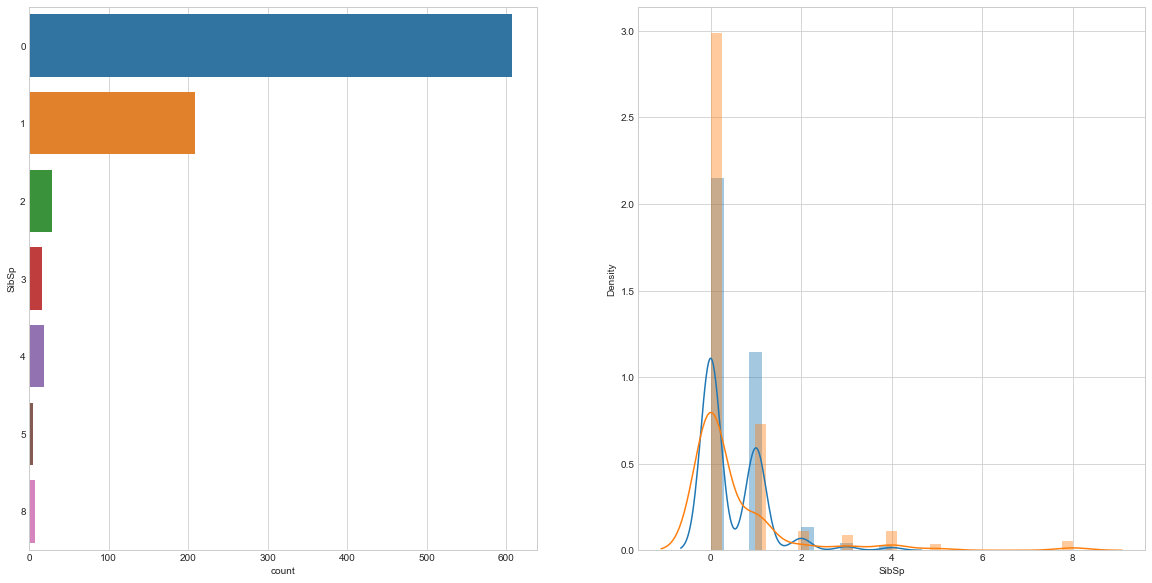

In [32]:
# Visualise the counts of SibSp and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

What does the graph on the right tell us?

### Feature: Parch

Description: The number of parents/children the passenger has aboard the Titanic.

Since this feature is similar to SibSp, we'll do a similar analysis.

In [33]:
# How many missing values does Parch have?
train.Parch.isnull().sum()

0

In [34]:
# What values are there?
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [35]:
# Add Parch to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

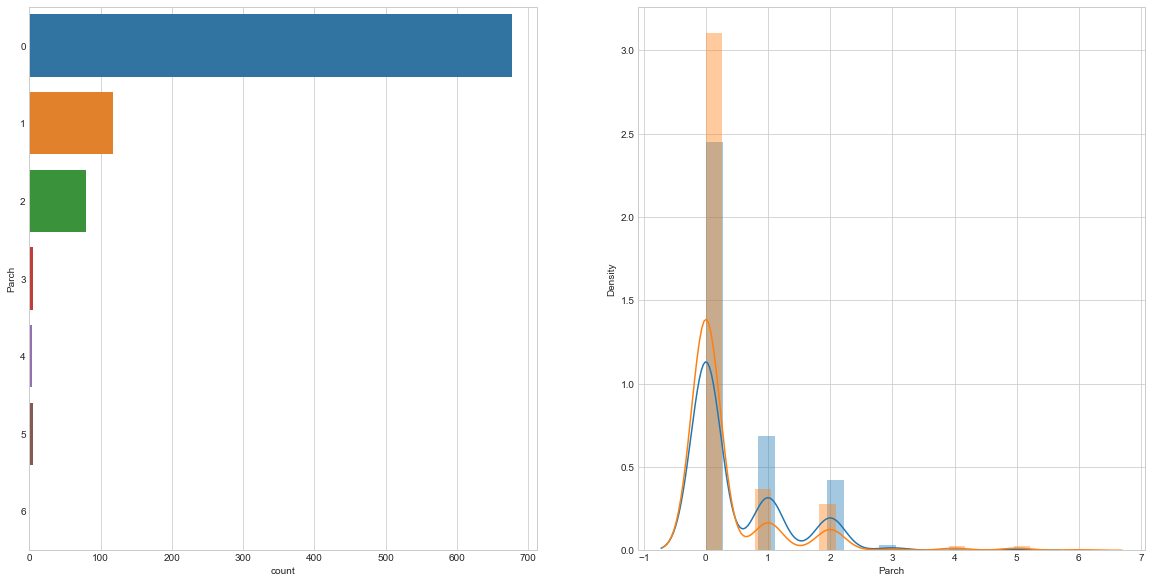

In [36]:
# Visualise the counts of Parch and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

What does the graph on the right tell us about `Parch`?

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


### Feature: Ticket

Description: The ticket number of the boarding passenger.

In [39]:
# How many missing values does Ticket have?
train.Ticket.isnull().sum()

0

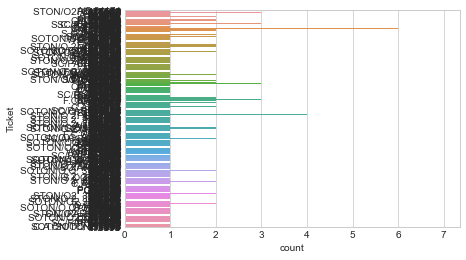

In [40]:
# How many kinds of ticket are there?
sns.countplot(y="Ticket", data=train);

That doesn't look too good, what about another way of looking at it?

In [41]:
# How many kinds of ticket are there?
train.Ticket.value_counts()

1601        7
347082      7
CA. 2343    7
347088      6
3101295     6
           ..
3411        1
347063      1
13049       1
239856      1
2687        1
Name: Ticket, Length: 681, dtype: int64

In [42]:
# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.Ticket.unique())))

There are 681 unique Ticket values.


681 unique values is too many for now. So we won't use `Ticket` in our subset dataframes.

There may be some way to reduce this down. 

**Challenge:** How could you reduce the Ticket feature? Is it even possible?

*Hint:* It may be similar to what you could do with Name.

### Feature: Fare

Description: How much the ticket cost.

In [43]:
# How many missing values does Fare have?
train.Fare.isnull().sum()

0

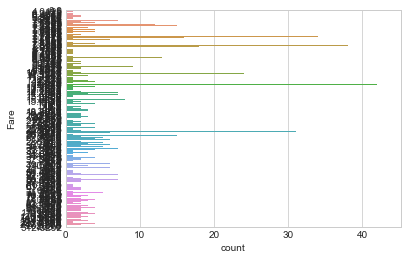

In [44]:
# How many different values of Fare are there?
sns.countplot(y="Fare", data=train);

In [45]:
# What kind of variable is Fare?
train.Fare.dtype

dtype('float64')

In [46]:
# How many unique kinds of Fare are there?
print("There are {} unique Fare values.".format(len(train.Fare.unique())))

There are 248 unique Fare values.


Because Fare is a float (number) let's add it as it is to our continuous sub dataframe but to add it to our categorical sub dataframe, we'll cut it into bins.

In [47]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised 

In [48]:
# What do our Fare bins look like?
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

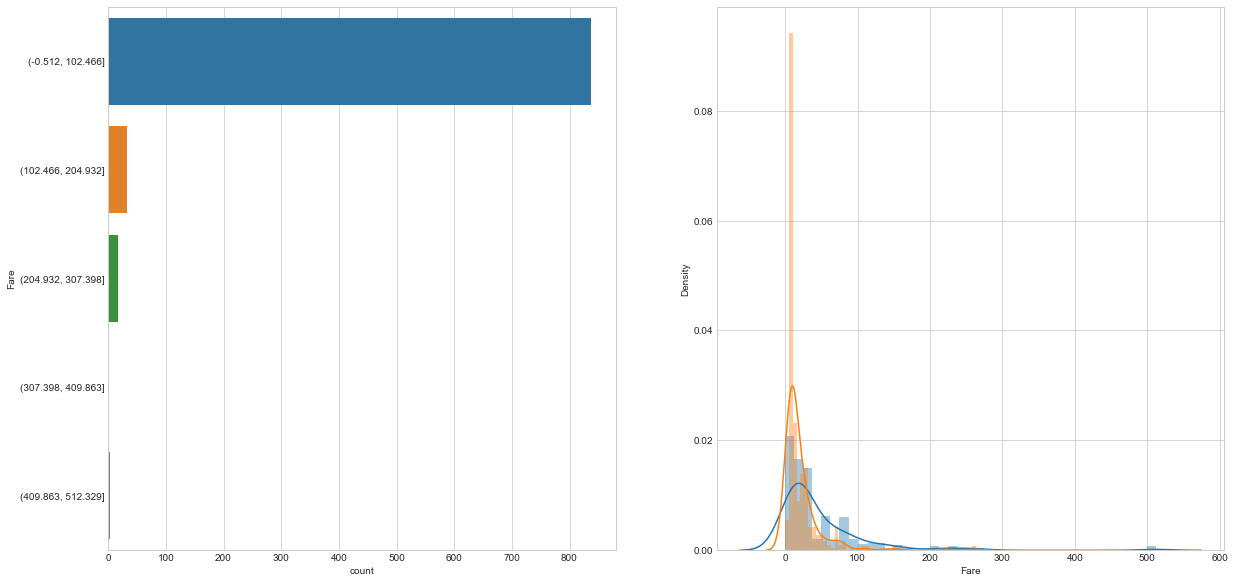

In [49]:
# Visualise the Fare bin counts as well as the Fare distribution versus Survived.
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,10), 
                use_bin_df=True)

**Challenge:** How would you change the Fare bins?

### Feature: Cabin

Description: The cabin number where the passenger was staying.    

In [50]:
# How many missing values does Cabin have?
train.Cabin.isnull().sum()

687

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
# What do the Cabin values look like?
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
F2             3
              ..
B78            1
A6             1
E10            1
D47            1
B102           1
Name: Cabin, Length: 147, dtype: int64

Since there are too many missing values, we won't use Cabin for our initial models and won't add it to our sub dataframes.

But how could you modify cabin to be more usable?

What could you do about the missing values?

### Feature: Embarked

Description: The port where the passenger boarded the Titanic.
    
Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [53]:
# How many missing values does Embarked have?
train.Embarked.isnull().sum()

2

In [54]:
# What kind of values are in Embarked?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Embarked is a categorical variable because there are 3 categories which a passenger could have boarded on.

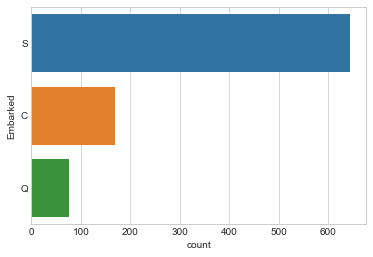

In [55]:
# What do the counts look like?
sns.countplot(y='Embarked', data=train);

#### How can we deal with the 2 missing values of Embarked?

One option is to drop the two rows which don't have an Embarked value.

Another option would be to randomly assign a value of C, Q or S to each row.

What are the pros and cons of each?

For now, we will remove those rows.

In [56]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [57]:
# Remove Embarked rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


We've removed the two rows with missing values for Embarked, now we can add Embarked to our sub dataframes.

## Feature Encoding
Now we have our two sub dataframes ready. We can encode the features so they're ready to be used with our machine learning models.

We will encode our binned dataframe (`df_bin`) with one-hot encoding and our continuous dataframe (`df_con`) with the label encoding function from `sklearn`.

In [58]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [59]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [60]:
df_con.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
5,0,3,male,0,0,8.4583,Q
6,0,1,male,0,0,51.8625,S
7,0,3,male,3,1,21.0750,S
8,1,3,female,0,2,11.1333,S
9,1,2,female,1,0,30.0708,C


**Update:** The original version of this notebook used the `LabelEncoder()` function for encoding `df_con_enc`. However, as Tomáš pointed out, OneHotEncoder is better to use.
    
Check this article for more details: https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621

In [61]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [62]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [63]:
# Let's look at df_con_enc
df_con_enc.head(20)

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,1,0,30.0708,1,0,0,1,0,0,1,0


## Start Building Machine Learning Models
Now our data has been manipulating and converted to numbers, we can run a series of different machine learning algorithms over it to find which yield the best results.

### Let's seperate the data

In [64]:
# Seclect the dataframe we want to use first for predictions
selected_df = df_con_enc

In [65]:
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [66]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [67]:
# Shape of the data (without labels)
X_train.shape

(889, 11)

In [68]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [69]:
# Shape of the labels
y_train.shape

(889,)

### Define a function to fit machine learning algorithms
Since many of the algorithms we will use are from the sklearn library, they all take similar (practically the same) inputs and produce similar outputs.

To prevent writing code multiple times, we will functionise fitting the model and returning the accuracy scores.

In [70]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

### Logistic Regression

In [71]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:06.100998


### K-Nearest Neighbours

In [72]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.46
Accuracy CV 10-Fold: 76.72
Running Time: 0:00:00.347230


### Gaussian Naive Bayes

In [73]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.117079


### Linear Support Vector Machines (SVC)

In [74]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 77.05
Accuracy CV 10-Fold: 76.94
Running Time: 0:00:00.468240


### Stochastic Gradient Descent

In [75]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 75.93
Accuracy CV 10-Fold: 64.57
Running Time: 0:00:00.151226


### Decision Tree Classifier

In [76]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.54
Running Time: 0:00:00.143039


### Gradient Boost Trees

In [77]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.61
Accuracy CV 10-Fold: 80.65
Running Time: 0:00:01.301128


### CatBoost Algorithm
CatBoost is a state-of-the-art open-source gradient boosting on decision trees library.

It's simple and easy to use. And is now regularly one of my go-to algorithms for any kind of machine learning task.

For more on CatBoost and the methods it uses to deal with categorical variables, check out the [CatBoost docs](https://catboost.ai/).

In [78]:
# View the data for the CatBoost model
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [79]:
# View the labels for the CatBoost model
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [80]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

This means Catboost has picked up that all variables except `Fare` can be treated as categorical.

In [81]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [82]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [83]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6862830	total: 82ms	remaining: 1m 21s
1:	learn: 0.6809444	total: 95.5ms	remaining: 47.7s
2:	learn: 0.6751692	total: 115ms	remaining: 38.1s
3:	learn: 0.6689060	total: 135ms	remaining: 33.6s
4:	learn: 0.6632144	total: 153ms	remaining: 30.4s
5:	learn: 0.6576488	total: 168ms	remaining: 27.9s
6:	learn: 0.6544441	total: 181ms	remaining: 25.7s
7:	learn: 0.6490635	total: 198ms	remaining: 24.6s
8:	learn: 0.6443241	total: 217ms	remaining: 23.9s
9:	learn: 0.6395935	total: 236ms	remaining: 23.3s
10:	learn: 0.6345186	total: 247ms	remaining: 22.2s
11:	learn: 0.6305316	total: 262ms	remaining: 21.6s
12:	learn: 0.6275610	total: 270ms	remaining: 20.5s
13:	learn: 0.6225020	total: 283ms	remaining: 20s
14:	learn: 0.6179503	total: 308ms	remaining: 20.3s
15:	learn: 0.6140480	total: 315ms	remaining: 19.4s
16:	learn: 0.6100034	total: 336ms	remaining: 19.4s
17:	learn: 0.6049646	total: 349ms	remaining: 19s
18:	learn: 0.6025760	total: 355ms	remaining: 18.4s
19:	learn: 0.5

170:	learn: 0.4213900	total: 2.69s	remaining: 13.1s
171:	learn: 0.4210836	total: 2.73s	remaining: 13.1s
172:	learn: 0.4208199	total: 2.74s	remaining: 13.1s
173:	learn: 0.4206421	total: 2.76s	remaining: 13.1s
174:	learn: 0.4201114	total: 2.77s	remaining: 13.1s
175:	learn: 0.4198212	total: 2.78s	remaining: 13s
176:	learn: 0.4195834	total: 2.79s	remaining: 13s
177:	learn: 0.4195685	total: 2.8s	remaining: 12.9s
178:	learn: 0.4194809	total: 2.8s	remaining: 12.9s
179:	learn: 0.4191368	total: 2.82s	remaining: 12.8s
180:	learn: 0.4185960	total: 2.83s	remaining: 12.8s
181:	learn: 0.4184559	total: 2.84s	remaining: 12.8s
182:	learn: 0.4180542	total: 2.86s	remaining: 12.8s
183:	learn: 0.4178579	total: 2.88s	remaining: 12.8s
184:	learn: 0.4175684	total: 2.89s	remaining: 12.7s
185:	learn: 0.4173356	total: 2.91s	remaining: 12.7s
186:	learn: 0.4169641	total: 2.92s	remaining: 12.7s
187:	learn: 0.4165340	total: 2.94s	remaining: 12.7s
188:	learn: 0.4162489	total: 2.95s	remaining: 12.7s
189:	learn: 0.4160

335:	learn: 0.3916127	total: 5.05s	remaining: 9.97s
336:	learn: 0.3914735	total: 5.06s	remaining: 9.96s
337:	learn: 0.3914486	total: 5.08s	remaining: 9.95s
338:	learn: 0.3912764	total: 5.09s	remaining: 9.93s
339:	learn: 0.3911365	total: 5.11s	remaining: 9.91s
340:	learn: 0.3910828	total: 5.12s	remaining: 9.9s
341:	learn: 0.3910413	total: 5.14s	remaining: 9.89s
342:	learn: 0.3910351	total: 5.15s	remaining: 9.87s
343:	learn: 0.3908388	total: 5.17s	remaining: 9.85s
344:	learn: 0.3907468	total: 5.19s	remaining: 9.85s
345:	learn: 0.3905556	total: 5.21s	remaining: 9.85s
346:	learn: 0.3905329	total: 5.23s	remaining: 9.84s
347:	learn: 0.3904624	total: 5.24s	remaining: 9.82s
348:	learn: 0.3904620	total: 5.25s	remaining: 9.79s
349:	learn: 0.3901004	total: 5.26s	remaining: 9.78s
350:	learn: 0.3900990	total: 5.27s	remaining: 9.75s
351:	learn: 0.3898423	total: 5.29s	remaining: 9.73s
352:	learn: 0.3898011	total: 5.3s	remaining: 9.72s
353:	learn: 0.3897611	total: 5.32s	remaining: 9.7s
354:	learn: 0.3

497:	learn: 0.3769625	total: 7.27s	remaining: 7.33s
498:	learn: 0.3768613	total: 7.29s	remaining: 7.32s
499:	learn: 0.3768611	total: 7.3s	remaining: 7.3s
500:	learn: 0.3768153	total: 7.32s	remaining: 7.29s
501:	learn: 0.3767849	total: 7.33s	remaining: 7.27s
502:	learn: 0.3765500	total: 7.35s	remaining: 7.26s
503:	learn: 0.3763980	total: 7.37s	remaining: 7.25s
504:	learn: 0.3763692	total: 7.38s	remaining: 7.24s
505:	learn: 0.3763085	total: 7.4s	remaining: 7.22s
506:	learn: 0.3761631	total: 7.41s	remaining: 7.21s
507:	learn: 0.3760934	total: 7.43s	remaining: 7.19s
508:	learn: 0.3760498	total: 7.44s	remaining: 7.18s
509:	learn: 0.3760150	total: 7.46s	remaining: 7.17s
510:	learn: 0.3759970	total: 7.48s	remaining: 7.15s
511:	learn: 0.3759798	total: 7.49s	remaining: 7.14s
512:	learn: 0.3759568	total: 7.5s	remaining: 7.12s
513:	learn: 0.3758344	total: 7.51s	remaining: 7.11s
514:	learn: 0.3757406	total: 7.53s	remaining: 7.09s
515:	learn: 0.3757113	total: 7.54s	remaining: 7.07s
516:	learn: 0.37

664:	learn: 0.3639302	total: 9.73s	remaining: 4.9s
665:	learn: 0.3638903	total: 9.74s	remaining: 4.89s
666:	learn: 0.3637239	total: 9.76s	remaining: 4.87s
667:	learn: 0.3635881	total: 9.78s	remaining: 4.86s
668:	learn: 0.3634772	total: 9.79s	remaining: 4.84s
669:	learn: 0.3634068	total: 9.8s	remaining: 4.83s
670:	learn: 0.3633759	total: 9.81s	remaining: 4.81s
671:	learn: 0.3631802	total: 9.83s	remaining: 4.8s
672:	learn: 0.3631026	total: 9.84s	remaining: 4.78s
673:	learn: 0.3630056	total: 9.85s	remaining: 4.76s
674:	learn: 0.3628564	total: 9.86s	remaining: 4.75s
675:	learn: 0.3628277	total: 9.88s	remaining: 4.73s
676:	learn: 0.3628277	total: 9.88s	remaining: 4.72s
677:	learn: 0.3627016	total: 9.9s	remaining: 4.7s
678:	learn: 0.3626910	total: 9.91s	remaining: 4.68s
679:	learn: 0.3624607	total: 9.93s	remaining: 4.67s
680:	learn: 0.3623905	total: 9.95s	remaining: 4.66s
681:	learn: 0.3623699	total: 9.96s	remaining: 4.64s
682:	learn: 0.3622673	total: 9.97s	remaining: 4.63s
683:	learn: 0.362

830:	learn: 0.3523327	total: 12.1s	remaining: 2.46s
831:	learn: 0.3523023	total: 12.1s	remaining: 2.45s
832:	learn: 0.3522949	total: 12.1s	remaining: 2.43s
833:	learn: 0.3521358	total: 12.2s	remaining: 2.42s
834:	learn: 0.3521053	total: 12.2s	remaining: 2.4s
835:	learn: 0.3520985	total: 12.2s	remaining: 2.39s
836:	learn: 0.3520746	total: 12.2s	remaining: 2.38s
837:	learn: 0.3519963	total: 12.2s	remaining: 2.36s
838:	learn: 0.3519587	total: 12.2s	remaining: 2.35s
839:	learn: 0.3518946	total: 12.3s	remaining: 2.33s
840:	learn: 0.3518871	total: 12.3s	remaining: 2.32s
841:	learn: 0.3518257	total: 12.3s	remaining: 2.31s
842:	learn: 0.3518257	total: 12.3s	remaining: 2.29s
843:	learn: 0.3516969	total: 12.3s	remaining: 2.28s
844:	learn: 0.3516134	total: 12.3s	remaining: 2.26s
845:	learn: 0.3515626	total: 12.4s	remaining: 2.25s
846:	learn: 0.3513883	total: 12.4s	remaining: 2.23s
847:	learn: 0.3512275	total: 12.4s	remaining: 2.22s
848:	learn: 0.3512070	total: 12.4s	remaining: 2.2s
849:	learn: 0.

993:	learn: 0.3402175	total: 14.8s	remaining: 89.5ms
994:	learn: 0.3399939	total: 14.9s	remaining: 74.9ms
995:	learn: 0.3399342	total: 14.9s	remaining: 60ms
996:	learn: 0.3398669	total: 15s	remaining: 45ms
997:	learn: 0.3398219	total: 15s	remaining: 30ms
998:	learn: 0.3397748	total: 15s	remaining: 15ms
999:	learn: 0.3396214	total: 15s	remaining: 0us


### Perform CatBoost cross-validation

In [84]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6746718	test: 0.6751020	best: 0.6751020 (0)	total: 3.45s	remaining: 57m 26s
1:	learn: 0.6573540	test: 0.6583602	best: 0.6583602 (1)	total: 7.08s	remaining: 58m 53s
2:	learn: 0.6408329	test: 0.6429257	best: 0.6429257 (2)	total: 11.5s	remaining: 1h 3m 45s
3:	learn: 0.6253924	test: 0.6283059	best: 0.6283059 (3)	total: 17.1s	remaining: 1h 11m
4:	learn: 0.6114190	test: 0.6150989	best: 0.6150989 (4)	total: 20.6s	remaining: 1h 8m 25s
5:	learn: 0.6004513	test: 0.6048524	best: 0.6048524 (5)	total: 25.7s	remaining: 1h 11m 5s
6:	learn: 0.5900482	test: 0.5949158	best: 0.5949158 (6)	total: 31s	remaining: 1h 13m 16s
7:	learn: 0.5800356	test: 0.5853301	best: 0.5853301 (7)	total: 35.4s	remaining: 1h 13m 8s
8:	learn: 0.5702086	test: 0.5757925	best: 0.5757925 (8)	total: 40.1s	remaining: 1h 13m 34s
9:	learn: 0.5612227	test: 0.5675857	best: 0.5675857 (9)	total: 45s	remaining: 1h 14m 14s
10:	learn: 0.5522686	test: 0.5589941	best: 0.5589941 (10)	total: 49.3s	remaining: 1h 13m 51s
11:	learn: 0.54

88:	learn: 0.3977839	test: 0.4407548	best: 0.4407548 (88)	total: 7m 31s	remaining: 1h 16m 57s
89:	learn: 0.3973309	test: 0.4406800	best: 0.4406800 (89)	total: 7m 37s	remaining: 1h 17m 7s
90:	learn: 0.3967894	test: 0.4407059	best: 0.4406800 (89)	total: 7m 43s	remaining: 1h 17m 12s
91:	learn: 0.3963210	test: 0.4406911	best: 0.4406800 (89)	total: 7m 47s	remaining: 1h 16m 50s
92:	learn: 0.3959080	test: 0.4406400	best: 0.4406400 (92)	total: 7m 50s	remaining: 1h 16m 30s
93:	learn: 0.3954346	test: 0.4406329	best: 0.4406329 (93)	total: 7m 55s	remaining: 1h 16m 25s
94:	learn: 0.3949190	test: 0.4403517	best: 0.4403517 (94)	total: 7m 59s	remaining: 1h 16m 11s
95:	learn: 0.3944340	test: 0.4402716	best: 0.4402716 (95)	total: 8m 3s	remaining: 1h 15m 56s
96:	learn: 0.3939860	test: 0.4401340	best: 0.4401340 (96)	total: 8m 8s	remaining: 1h 15m 46s
97:	learn: 0.3934840	test: 0.4400352	best: 0.4400352 (97)	total: 8m 13s	remaining: 1h 15m 40s
98:	learn: 0.3930306	test: 0.4398759	best: 0.4398759 (98)	total

174:	learn: 0.3694642	test: 0.4380150	best: 0.4375885 (133)	total: 14m 44s	remaining: 1h 9m 28s
175:	learn: 0.3691009	test: 0.4380279	best: 0.4375885 (133)	total: 14m 50s	remaining: 1h 9m 28s
176:	learn: 0.3688905	test: 0.4381575	best: 0.4375885 (133)	total: 14m 56s	remaining: 1h 9m 28s
177:	learn: 0.3686335	test: 0.4382308	best: 0.4375885 (133)	total: 15m	remaining: 1h 9m 16s
178:	learn: 0.3684197	test: 0.4383125	best: 0.4375885 (133)	total: 15m 4s	remaining: 1h 9m 7s
179:	learn: 0.3681903	test: 0.4383017	best: 0.4375885 (133)	total: 15m 10s	remaining: 1h 9m 7s
180:	learn: 0.3679923	test: 0.4383894	best: 0.4375885 (133)	total: 15m 15s	remaining: 1h 9m 4s
181:	learn: 0.3678126	test: 0.4384124	best: 0.4375885 (133)	total: 15m 21s	remaining: 1h 9m 1s
182:	learn: 0.3675369	test: 0.4382845	best: 0.4375885 (133)	total: 15m 24s	remaining: 1h 8m 49s
183:	learn: 0.3672577	test: 0.4384239	best: 0.4375885 (133)	total: 15m 29s	remaining: 1h 8m 43s
184:	learn: 0.3670808	test: 0.4384315	best: 0.437

260:	learn: 0.3485245	test: 0.4381079	best: 0.4375885 (133)	total: 22m 42s	remaining: 1h 4m 16s
261:	learn: 0.3483311	test: 0.4382153	best: 0.4375885 (133)	total: 22m 47s	remaining: 1h 4m 11s
262:	learn: 0.3481169	test: 0.4382836	best: 0.4375885 (133)	total: 22m 52s	remaining: 1h 4m 5s
263:	learn: 0.3479288	test: 0.4383849	best: 0.4375885 (133)	total: 22m 58s	remaining: 1h 4m 1s
264:	learn: 0.3477250	test: 0.4385126	best: 0.4375885 (133)	total: 23m 3s	remaining: 1h 3m 57s
265:	learn: 0.3475114	test: 0.4386448	best: 0.4375885 (133)	total: 23m 9s	remaining: 1h 3m 55s
266:	learn: 0.3473040	test: 0.4386385	best: 0.4375885 (133)	total: 23m 15s	remaining: 1h 3m 50s
267:	learn: 0.3470589	test: 0.4386647	best: 0.4375885 (133)	total: 23m 19s	remaining: 1h 3m 43s
268:	learn: 0.3467922	test: 0.4387938	best: 0.4375885 (133)	total: 23m 24s	remaining: 1h 3m 36s
269:	learn: 0.3463460	test: 0.4386331	best: 0.4375885 (133)	total: 23m 29s	remaining: 1h 3m 30s
270:	learn: 0.3461522	test: 0.4385446	best: 

347:	learn: 0.3267963	test: 0.4368393	best: 0.4368393 (347)	total: 30m 21s	remaining: 56m 53s
348:	learn: 0.3265800	test: 0.4368590	best: 0.4368393 (347)	total: 30m 26s	remaining: 56m 47s
349:	learn: 0.3263532	test: 0.4367292	best: 0.4367292 (349)	total: 30m 32s	remaining: 56m 42s
350:	learn: 0.3260335	test: 0.4367583	best: 0.4367292 (349)	total: 30m 37s	remaining: 56m 37s
351:	learn: 0.3257708	test: 0.4366604	best: 0.4366604 (351)	total: 30m 42s	remaining: 56m 31s
352:	learn: 0.3253966	test: 0.4366938	best: 0.4366604 (351)	total: 30m 47s	remaining: 56m 26s
353:	learn: 0.3250437	test: 0.4368238	best: 0.4366604 (351)	total: 30m 52s	remaining: 56m 21s
354:	learn: 0.3247261	test: 0.4366765	best: 0.4366604 (351)	total: 30m 58s	remaining: 56m 16s
355:	learn: 0.3244062	test: 0.4366467	best: 0.4366467 (355)	total: 31m 2s	remaining: 56m 9s
356:	learn: 0.3240140	test: 0.4365042	best: 0.4365042 (356)	total: 31m 7s	remaining: 56m 3s
357:	learn: 0.3237978	test: 0.4364610	best: 0.4364610 (357)	tota

435:	learn: 0.3052204	test: 0.4334206	best: 0.4333669 (432)	total: 38m 27s	remaining: 49m 44s
436:	learn: 0.3050698	test: 0.4335151	best: 0.4333669 (432)	total: 38m 32s	remaining: 49m 38s
437:	learn: 0.3047879	test: 0.4334492	best: 0.4333669 (432)	total: 38m 36s	remaining: 49m 32s
438:	learn: 0.3046007	test: 0.4333917	best: 0.4333669 (432)	total: 38m 41s	remaining: 49m 26s
439:	learn: 0.3044894	test: 0.4334150	best: 0.4333669 (432)	total: 38m 46s	remaining: 49m 20s
440:	learn: 0.3043265	test: 0.4335227	best: 0.4333669 (432)	total: 38m 50s	remaining: 49m 14s
441:	learn: 0.3041210	test: 0.4334722	best: 0.4333669 (432)	total: 38m 55s	remaining: 49m 8s
442:	learn: 0.3039089	test: 0.4333488	best: 0.4333488 (442)	total: 39m 2s	remaining: 49m 5s
443:	learn: 0.3037218	test: 0.4334071	best: 0.4333488 (442)	total: 39m 8s	remaining: 49m 1s
444:	learn: 0.3034592	test: 0.4334150	best: 0.4333488 (442)	total: 39m 13s	remaining: 48m 54s
445:	learn: 0.3032770	test: 0.4333923	best: 0.4333488 (442)	total

523:	learn: 0.2882237	test: 0.4326460	best: 0.4320750 (502)	total: 45m 55s	remaining: 41m 43s
524:	learn: 0.2880393	test: 0.4325946	best: 0.4320750 (502)	total: 46m	remaining: 41m 37s
525:	learn: 0.2878791	test: 0.4326951	best: 0.4320750 (502)	total: 46m 5s	remaining: 41m 31s
526:	learn: 0.2876788	test: 0.4327238	best: 0.4320750 (502)	total: 46m 10s	remaining: 41m 26s
527:	learn: 0.2875348	test: 0.4327696	best: 0.4320750 (502)	total: 46m 14s	remaining: 41m 20s
528:	learn: 0.2872599	test: 0.4327186	best: 0.4320750 (502)	total: 46m 19s	remaining: 41m 14s
529:	learn: 0.2870168	test: 0.4328814	best: 0.4320750 (502)	total: 46m 24s	remaining: 41m 9s
530:	learn: 0.2868869	test: 0.4328016	best: 0.4320750 (502)	total: 46m 30s	remaining: 41m 4s
531:	learn: 0.2865942	test: 0.4326157	best: 0.4320750 (502)	total: 46m 35s	remaining: 40m 59s
532:	learn: 0.2864453	test: 0.4325459	best: 0.4320750 (502)	total: 46m 40s	remaining: 40m 53s
533:	learn: 0.2862115	test: 0.4324408	best: 0.4320750 (502)	total: 

611:	learn: 0.2729004	test: 0.4325940	best: 0.4320750 (502)	total: 55m 27s	remaining: 35m 9s
612:	learn: 0.2727616	test: 0.4325734	best: 0.4320750 (502)	total: 55m 35s	remaining: 35m 5s
613:	learn: 0.2726017	test: 0.4325667	best: 0.4320750 (502)	total: 55m 41s	remaining: 35m
614:	learn: 0.2724360	test: 0.4325300	best: 0.4320750 (502)	total: 55m 49s	remaining: 34m 56s
615:	learn: 0.2723018	test: 0.4326013	best: 0.4320750 (502)	total: 55m 54s	remaining: 34m 50s
616:	learn: 0.2721762	test: 0.4325721	best: 0.4320750 (502)	total: 56m 2s	remaining: 34m 47s
617:	learn: 0.2719939	test: 0.4325070	best: 0.4320750 (502)	total: 56m 9s	remaining: 34m 42s
618:	learn: 0.2717858	test: 0.4324518	best: 0.4320750 (502)	total: 56m 15s	remaining: 34m 37s
619:	learn: 0.2716720	test: 0.4324867	best: 0.4320750 (502)	total: 56m 21s	remaining: 34m 32s
620:	learn: 0.2715063	test: 0.4325736	best: 0.4320750 (502)	total: 56m 26s	remaining: 34m 26s
621:	learn: 0.2713287	test: 0.4326050	best: 0.4320750 (502)	total: 5

698:	learn: 0.2600671	test: 0.4333742	best: 0.4320750 (502)	total: 1h 4m 36s	remaining: 27m 49s
699:	learn: 0.2599560	test: 0.4333263	best: 0.4320750 (502)	total: 1h 4m 40s	remaining: 27m 43s
700:	learn: 0.2597981	test: 0.4334144	best: 0.4320750 (502)	total: 1h 4m 45s	remaining: 27m 37s
701:	learn: 0.2596849	test: 0.4334274	best: 0.4320750 (502)	total: 1h 4m 50s	remaining: 27m 31s
702:	learn: 0.2595497	test: 0.4334090	best: 0.4320750 (502)	total: 1h 4m 55s	remaining: 27m 25s
703:	learn: 0.2594238	test: 0.4333859	best: 0.4320750 (502)	total: 1h 4m 59s	remaining: 27m 19s
704:	learn: 0.2593448	test: 0.4334076	best: 0.4320750 (502)	total: 1h 5m 4s	remaining: 27m 13s
705:	learn: 0.2592205	test: 0.4334116	best: 0.4320750 (502)	total: 1h 5m 10s	remaining: 27m 8s
706:	learn: 0.2590820	test: 0.4333826	best: 0.4320750 (502)	total: 1h 5m 18s	remaining: 27m 3s
707:	learn: 0.2590055	test: 0.4334517	best: 0.4320750 (502)	total: 1h 5m 24s	remaining: 26m 58s
708:	learn: 0.2588383	test: 0.4333775	best:

784:	learn: 0.2486552	test: 0.4342945	best: 0.4320750 (502)	total: 1h 12m 21s	remaining: 19m 49s
785:	learn: 0.2485666	test: 0.4342381	best: 0.4320750 (502)	total: 1h 12m 26s	remaining: 19m 43s
786:	learn: 0.2484601	test: 0.4342937	best: 0.4320750 (502)	total: 1h 12m 31s	remaining: 19m 37s
787:	learn: 0.2483762	test: 0.4343312	best: 0.4320750 (502)	total: 1h 12m 36s	remaining: 19m 31s
788:	learn: 0.2482692	test: 0.4343696	best: 0.4320750 (502)	total: 1h 12m 41s	remaining: 19m 26s
789:	learn: 0.2480813	test: 0.4342385	best: 0.4320750 (502)	total: 1h 12m 47s	remaining: 19m 20s
790:	learn: 0.2479408	test: 0.4342657	best: 0.4320750 (502)	total: 1h 12m 51s	remaining: 19m 15s
791:	learn: 0.2477937	test: 0.4341648	best: 0.4320750 (502)	total: 1h 12m 57s	remaining: 19m 9s
792:	learn: 0.2476640	test: 0.4342088	best: 0.4320750 (502)	total: 1h 13m 2s	remaining: 19m 4s
793:	learn: 0.2475572	test: 0.4341442	best: 0.4320750 (502)	total: 1h 13m 7s	remaining: 18m 58s
794:	learn: 0.2474062	test: 0.4341

869:	learn: 0.2379413	test: 0.4356269	best: 0.4320750 (502)	total: 1h 19m 34s	remaining: 11m 53s
870:	learn: 0.2378338	test: 0.4355949	best: 0.4320750 (502)	total: 1h 19m 39s	remaining: 11m 47s
871:	learn: 0.2376825	test: 0.4356572	best: 0.4320750 (502)	total: 1h 19m 44s	remaining: 11m 42s
872:	learn: 0.2375663	test: 0.4356443	best: 0.4320750 (502)	total: 1h 19m 49s	remaining: 11m 36s
873:	learn: 0.2374644	test: 0.4357637	best: 0.4320750 (502)	total: 1h 19m 56s	remaining: 11m 31s
874:	learn: 0.2373944	test: 0.4357310	best: 0.4320750 (502)	total: 1h 20m 2s	remaining: 11m 26s
875:	learn: 0.2372857	test: 0.4356898	best: 0.4320750 (502)	total: 1h 20m 10s	remaining: 11m 21s
876:	learn: 0.2371945	test: 0.4356562	best: 0.4320750 (502)	total: 1h 20m 18s	remaining: 11m 15s
877:	learn: 0.2370959	test: 0.4357051	best: 0.4320750 (502)	total: 1h 20m 26s	remaining: 11m 10s
878:	learn: 0.2369893	test: 0.4357227	best: 0.4320750 (502)	total: 1h 20m 30s	remaining: 11m 4s
879:	learn: 0.2368576	test: 0.43

955:	learn: 0.2286226	test: 0.4367678	best: 0.4320750 (502)	total: 1h 27m 7s	remaining: 4m
956:	learn: 0.2285453	test: 0.4367747	best: 0.4320750 (502)	total: 1h 27m 12s	remaining: 3m 55s
957:	learn: 0.2284268	test: 0.4368523	best: 0.4320750 (502)	total: 1h 27m 18s	remaining: 3m 49s
958:	learn: 0.2283121	test: 0.4369213	best: 0.4320750 (502)	total: 1h 27m 22s	remaining: 3m 44s
959:	learn: 0.2282274	test: 0.4369488	best: 0.4320750 (502)	total: 1h 27m 27s	remaining: 3m 38s
960:	learn: 0.2281434	test: 0.4369285	best: 0.4320750 (502)	total: 1h 27m 32s	remaining: 3m 33s
961:	learn: 0.2280355	test: 0.4368997	best: 0.4320750 (502)	total: 1h 27m 37s	remaining: 3m 27s
962:	learn: 0.2279637	test: 0.4368655	best: 0.4320750 (502)	total: 1h 27m 42s	remaining: 3m 22s
963:	learn: 0.2278576	test: 0.4368054	best: 0.4320750 (502)	total: 1h 27m 47s	remaining: 3m 16s
964:	learn: 0.2277688	test: 0.4368781	best: 0.4320750 (502)	total: 1h 27m 51s	remaining: 3m 11s
965:	learn: 0.2276667	test: 0.4367777	best: 0

In [85]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 83.91
Accuracy cross-validation 10-Fold: 81.32
Running Time: 1:30:57.152273


## Model Results
Which model had the best cross-validation accuracy?

**Note:** We care most about cross-validation metrics because the metrics we get from `.fit()` can randomly score higher than usual.

### Regular accuracy scores

In [86]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,92.46
6,Gradient Boosting Trees,86.61
7,CatBoost,83.91
0,KNN,83.46
1,Logistic Regression,79.98
2,Naive Bayes,78.52
4,Linear SVC,77.05
3,Stochastic Gradient Decent,75.93


In [87]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,81.32
6,Gradient Boosting Trees,80.65
5,Decision Tree,80.54
1,Logistic Regression,79.42
2,Naive Bayes,77.95
4,Linear SVC,76.94
0,KNN,76.72
3,Stochastic Gradient Decent,64.57


We can see from the tables, the CatBoost model had the best results. Getting just under 82% is pretty good considering guessing would result in about 50% accuracy (0 or 1).

We'll pay more attention to the cross-validation figure.

Cross-validation is more robust than just the `.fit()` models as it does multiple passes over the data instead of one.

Because the CatBoost model got the best results, we'll use it for the next steps.

**Challenge:** How could you improve the CatBoost model?

## Feature Importance
Which features of the best model were most important for making predictions?

In [88]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png') 

,imp,col
4,0.992061,embarked_Q
3,1.213711,embarked_C
5,1.677219,embarked_S
9,2.178083,pclass_2
8,3.243021,pclass_1
0,10.797435,SibSp
10,11.205450,pclass_3
1,13.988886,Parch
2,15.753218,Fare
6,17.695520,sex_female


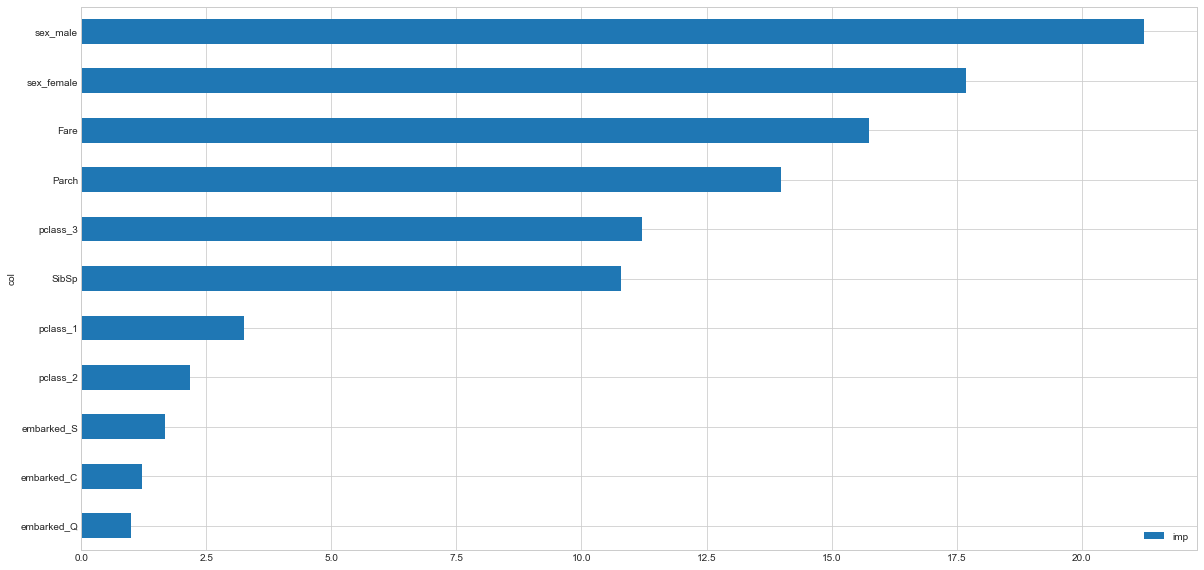

In [89]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

#### Why would you want feature importance?

Featrue importance shows how much each feature contributed to the model.

You could take this information and remove features which don't contribute much to reduce dimenstionality (and save compute).

You could improve features which don't offer much to the overall model.

Or you could improve features which offer more to the model. In this case, there aren't many ways you could improve sex as it's already a binary.

Feature importance figures also show people who may not be familiar with the problem what features of their data are most important when it comes to making predictions with machine learning models.

## Precision and Recall

Precision and recall are two metrics which are used for cases where you have have an imbalanced classification problem.

For example, you may have 100,000 people and only 1 of them gets a certain disease. If your model predicts that all people don't have the disease, it only misses 1 in 100,000 so its accuracy is 99.999%. But this isn't really helpful.

This is where precision an recall come in.

**Recall** = a metric which measures a models ability to find all the relevant cases in a dataset.

Recall would be the models ability to find the 1 person in 100,000 who has the disease.

**Precision** = a metric which measures a models ability to correctly identify only relevant instances.

In our example, Precision would be if the model found the 1 person who had the disease, did they actually have the disease.

Combining the precision and recall, gives an **F1 score.**

These metrics will all fall between 0 and 1, with a higher value being better.

Although, they don't necessarily need to come into play for our Titantic problem, they're worth remembering for your future work.

In [90]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8286662683284687
Recall: 0.6833382352941176
F1: 0.7489789466084935
AUC: 0.8842839467480982


Recall is low, this means there's a higher amount of false negatives (predicting Did not survive when it was actually Survived).

Precision is higher therefore there's less false positives (predicting Survived, when it was actually Did not survive).

**Challenge:** What are some ways to visualise precision and recall? 
*Hint:* You may want to look into what a confusion matrix is, you can find much more information in this blog post: [Beyond Accuracy: Precision and Recall](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c)

## Submission
Let's use the model with the highest cross-validation accuracy score to make a prediction on the test dataset and then submit our predictions to Kaggle.

We want to make predictions on the same kind of columnns our model is trained on.

So we have to select the subset of right columns of the `test` dateframe, encode them and make a prediciton with our model.

In [91]:
# We need our test dataframe to look like this one
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [92]:
# Our test dataframe has some columns our model hasn't been trained on
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [93]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [94]:
# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [95]:
# Let's look at test, it should have one hot encoded columns now
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


The columns in `test` have been converted to the same format at `df_con_enc`. Now we can make predictions on the `test` dataframe columns we built a model on.

We can find the columns we made predictions on with `X_train.columns`.

In [96]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [97]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns])

In [98]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [99]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [100]:
# What does our submission have to look like?
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


We need our `submission` dataframe to look like the `gender_submisison` dataframe, so we'll turn the `Survived` column into integers.

In [101]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [102]:
# How does our submission dataframe look?
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [106]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [109]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('catboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [110]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("../catboost_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


### Now submit your .csv to Kaggle! 

https://www.kaggle.com/c/titanic/submit

## Possible Extensions

These are all possible options to improve this pipeline. I'd suggest starting with the feature engineering (improving and manipulating the existing data) first.

* What can you do with the `Age` feature?
    * How would fill up all the missing values?
    * You may want to look into the `interpolate()` function of Pandas for this
<br>
<br>
2. What can you do with the `Name` feature?
    * What titles did the passengers have? Did this influence their survival?
<br>
<br>
3. What can you do with the `Cabin` feature?
    * Is there a way to see whether they had a cabin or not?
<br>
<br>
4. Can you combine the `SibSp` and `Parch` features to see if the person was alone or not?
<br>
<br>
5. Could you do a PCA/feature analysis to see what features are more important than others?
    * Does removing the less important model features improve the model?
<br>
<br>
7. The models take a bunch of hyperparameters but we've mostly used the default settings, is there a way to find which hyperparameters are best to use?
    * Tip: Check out the `CatBoost` with Python tutorial and the [hyperopt library](https://github.com/hyperopt/hyperopt) to see if you can improve the CatBoost model

    

## References and Learn More

* [Sklearn Classification Notebook by Daniel Furasso](https://github.com/dformoso/sklearn-classification/blob/master/Data%20Science%20Workbook%20-%20Census%20Income%20Dataset.ipynb) - Daniel has done some epic work showing how you can take a bigger dataset, clean it up and perform some similar classification work from scratch. It would be a great next step after going through this one.
<br>

* [Encoding categorical features in Python blog post by Practical Python Business](http://pbpython.com/categorical-encoding.html) - this blog post sheds some great light on how to deal with categorical features in Python. The rest of the website contains plenty more great information for using Python in a business environment.
<br>

* [CatBoost Python tutorial on GitHub](https://github.com/catboost/tutorials/blob/master/python_tutorial.ipynb) - the tutorial is based on the Titanic Dataset and has some great tricks to improve the results in this notebook.
<br>

* [Shap library](https://github.com/slundberg/shap) - a great (and beautiful) alternative to viewing feature importance. Can you use this to improve on the feature importance graphics?

## Don't forget!
If you complete the challenges or get a better score than the one listed in this notebook, [tweet me](www.twitter.com/mrdbourke) (@mrdbourke) and I'll give your work a shout out.

Keep learning,

Daniel

daniel@mrdbourke.com